# IMAGE NOISE REDUCTION WITH FFT

In [70]:
#importing libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

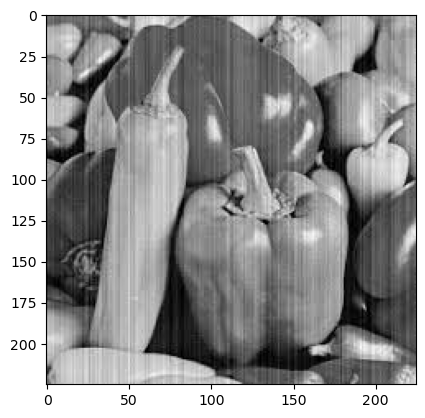

In [71]:
image = plt.imread("dsp_project/images1.jpeg") #uploading a noisy image
plt.imshow(image, cmap='gray') #showing the noisy image 

In [72]:
image.shape, image.dtype #printing the shape and type of the original image

((225, 225, 3), dtype('uint8'))

((225, 225), dtype('float64'))

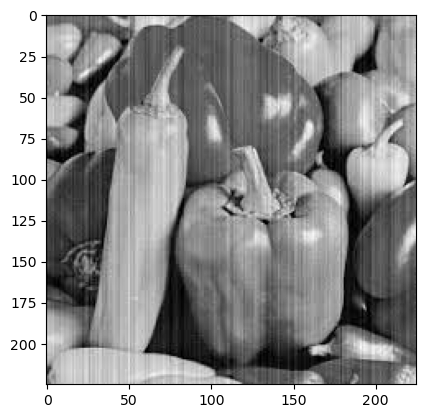

In [73]:
from skimage import color
from skimage import io

#converting image to grayscale
image = color.rgb2gray(io.imread('dsp_project/images1.jpeg'))
plt.imshow(image, cmap='gray') #showing the noisy image in grayscale
image.shape, image.dtype #printing the shape and type of the grayscale image

In [74]:
#checking the maximum and minimum pixel numbers of the image
maxValue = np.amax(image)
minValue = np.amin(image)
print("max value: ", maxValue, "\nmin value: ", minValue)

max value:  1.0 
min value:  0.0


Text(0.5, 1.0, 'Magnitude (Grayscale)')

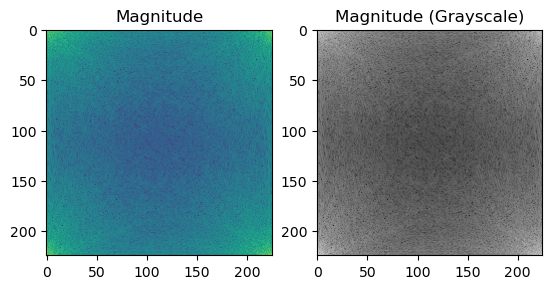

In [75]:
f = np.fft.fft2(image) #applying 2d fft

#the magnitude of fft
magnitude = np.log(np.abs(f))

#visualizing the magnitude 
fig, ax = plt.subplots(1,2)
ax[0].imshow(magnitude)
ax[0].set_title('Magnitude')
ax[1].imshow(magnitude, cmap = 'gray') #visualizing the magnitude in grayscale
ax[1].set_title('Magnitude (Grayscale)')

Text(0.5, 1.0, 'Magnitude Spectrum (Grayscale)')

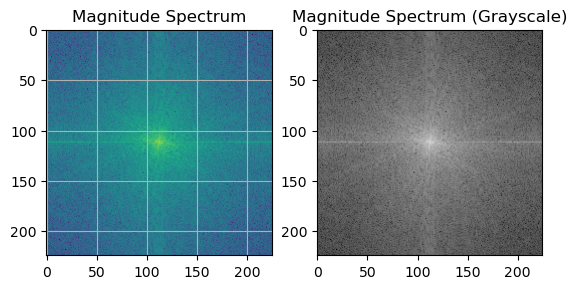

In [76]:
fshift = np.fft.fftshift(f) 
#fftshift recenters the results so that zero frequencies are in the centre 
magnitude_spectrum = np.log(np.abs(fshift))

#visualizing the magnitude spectrum
fig, ax = plt.subplots(1, 2)
ax[0].imshow(magnitude_spectrum)
ax[0].set_title('Magnitude Spectrum')
ax[0].grid() #adding grids
ax[1].imshow(magnitude_spectrum, cmap = 'gray')
ax[1].set_title('Magnitude Spectrum (Grayscale)')

Text(0.5, 1.0, 'Phase  (Grayscale)')

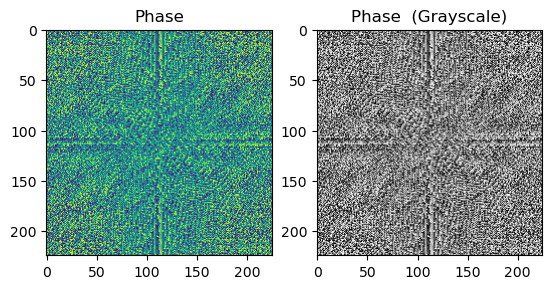

In [77]:
phase = np.angle(fshift) 

#visualizing phase
fig, ax = plt.subplots(1, 2)
ax[0].imshow(phase)
ax[0].set_title('Phase')
ax[1].imshow(phase, cmap = 'gray')
ax[1].set_title('Phase  (Grayscale)')  

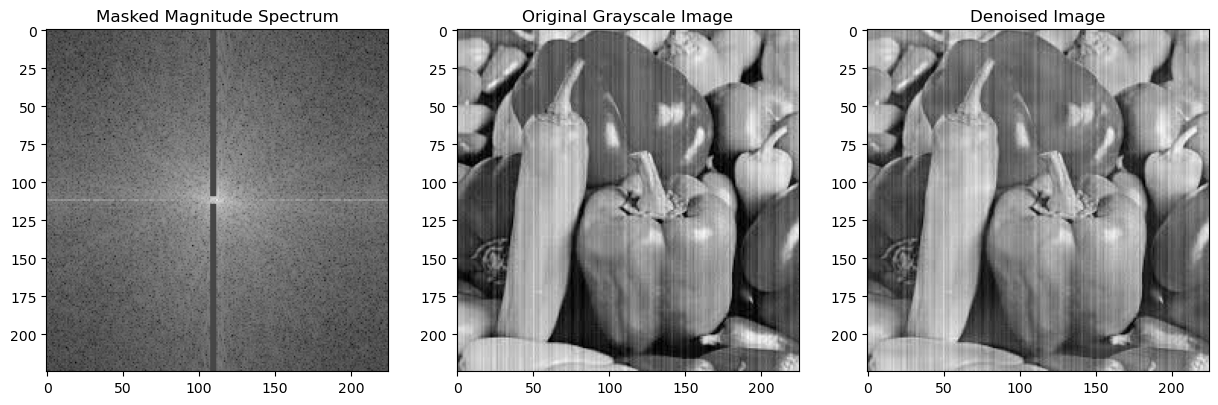

In [78]:
#defining a function for denoising the image

def fourier_denoise(image):
    #removing the noisy parts revealed in the magnitude spectrum
    fshift[:110, 108:112] = 1
    fshift[115:, 108:112] = 1
    fig, ax = plt.subplots(1, 3,figsize=(15,15))
    ax[0].imshow(np.log(np.abs(fshift)), cmap='gray')
    ax[0].set_title('Masked Magnitude Spectrum')
    ax[1].imshow(image, cmap = 'gray')
    ax[1].set_title('Original Grayscale Image')
    f_ishift = np.fft.ifftshift(fshift) #inverse fft of fshift
    img_back = np.fft.ifft2(f_ishift) #getting the image back to time domain from frequency domain with inverse fft
    img_back = np.real(img_back) 
    ax[2].imshow(img_back, cmap='gray')
    ax[2].set_title('Denoised Image')
    
fourier_denoise(image) #denoising the original grayscale image using the function defined above

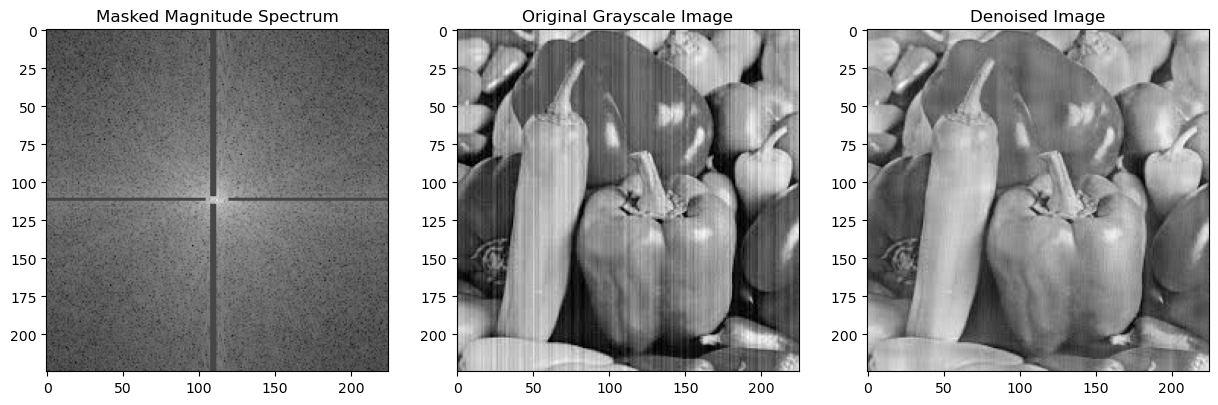

In [79]:
#defining a function for denoising the image
def fourier_denoise(image):
    #removing the noisy parts revealed in the magnitude spectrum
    fshift[111:113, :105] = 1
    fshift[111:113, 120:] = 1
    fig, ax = plt.subplots(1, 3,figsize=(15,15))
    ax[0].imshow(np.log(np.abs(fshift)), cmap='gray')
    ax[0].set_title('Masked Magnitude Spectrum')
    ax[1].imshow(image, cmap='gray')
    ax[1].set_title('Original Grayscale Image')
    f_ishift = np.fft.ifftshift(fshift) #inverse fft of fshift
    img_back = np.fft.ifft2(f_ishift) #getting the image back to time domain from frequency domain with inverse fft
    img_back = np.real(img_back)
    ax[2].imshow(img_back, cmap='gray')
    ax[2].set_title('Denoised Image')
    
fourier_denoise(image) #denoising the original grayscale image using the function defined above
